# Market Basket Analysis using Apriori Algorithm

In [ ]:
!pip install apyori


## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from apyori import apriori
import matplotlib.pyplot as plt

## loading dataset

In [ ]:
data = pd.read_csv("/content/Market_Basket_Optimisation (3).csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ploting the frequency matrix

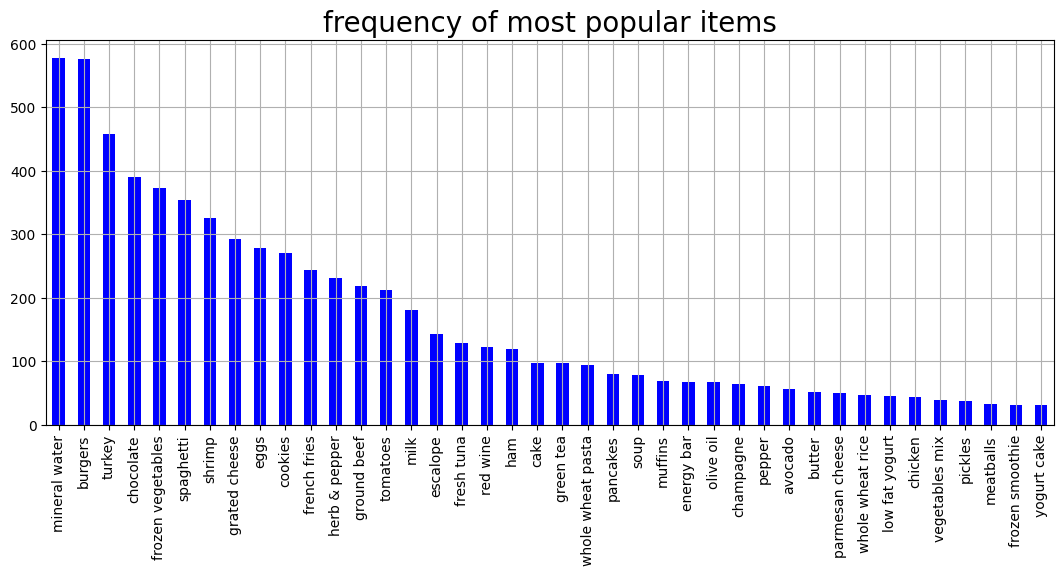

In [ ]:
color = "b"
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
columns = data.columns
rows = len(data.index)
print("Total Transactions : ", rows)
print("Total items : ", len(columns))

Total Transactions :  7501
Total items :  20


## Creating the nested list for storing the items

In [ ]:
records = []
for i in range(0, rows):
    records.append([str(data.values[i,u]) for u in range(0, 20)])
updated_records = []
for i in records:
  if "nan" in i:
    for j in range(i.count("nan")):
      i.remove("nan")
    updated_records.append(i)

In [ ]:
print(updated_records)

[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate'], ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'], ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['rice', 'sparkling water'], ['spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['burgers', 'grated chee

## Applying the apriori algorithm for finding the association rules


In [ ]:
rules = apriori(updated_records, min_support=0.0045, min_confidence=0.20, min_lift=3, min_length = 3)

In [ ]:
results = list(rules)
print(results)

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)]), RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)]), RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005866666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.700185158809287)]), RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.016, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.32

## Extracting the data from the results

In [ ]:
items = []
support = []
item_base = []
item_add = []

for i in results:
  items.append(i[0])
  support.append(i[1])
  item_base.append(i[2][0][0])
  item_add.append(i[2][0][1])
outcomes = pd.DataFrame({"items":items, "support":support, "item_base":item_base, "item_add":item_add})


## Sorting the data with respect to support in decreasing order

In [ ]:
sorted_data = outcomes.sort_values("support", ascending=False)
sorted_data

,items,support,item_base,item_add
3,"(herb & pepper, ground beef)",0.016000,(herb & pepper),(ground beef)
9,"(spaghetti, frozen vegetables, ground beef)",0.008667,"(spaghetti, frozen vegetables)",(ground beef)
5,"(whole wheat pasta, olive oil)",0.008000,(whole wheat pasta),(olive oil)
11,"(shrimp, mineral water, frozen vegetables)",0.007200,"(mineral water, shrimp)",(frozen vegetables)
20,"(spaghetti, milk, olive oil)",0.007200,"(spaghetti, milk)",(olive oil)
16,"(mineral water, herb & pepper, ground beef)",0.006667,"(mineral water, herb & pepper)",(ground beef)
14,"(spaghetti, frozen vegetables, tomatoes)",0.006667,"(spaghetti, frozen vegetables)",(tomatoes)
17,"(spaghetti, herb & pepper, ground beef)",0.006400,"(spaghetti, herb & pepper)",(ground beef)
19,"(spaghetti, shrimp, ground beef)",0.006000,"(shrimp, ground beef)",(spaghetti)
13,"(shrimp, spaghetti, frozen vegetables)",0.006000,"(spaghetti, frozen vegetables)",(shrimp)
